In [80]:
using SparseArrays
using LinearAlgebra
using NLopt
using PyPlot
using KrylovKit
using FiniteDifferences
using TopologyOptimizationHelper

In [81]:
# Our favorite parameters for testing
L = 20
ε = ones(480)
ω = 2π

A, x = Maxwell1d(L, ε, ω)
M = length(x)
b = zeros(M)
b[M÷2] = 1;

In [101]:
LDOS_opt, ε_opt, LDOS_vals = LDOS_Optimize(L, ε, ω; max_eval=10000, ftol=0)
LDOS_opt

numevals = opt.numevals = 10000


143.57603094005495

In [102]:
mod_LDOS_opt, mod_ε_opt, mod_LDOS_vals, Q_vals = mod_LDOS_Optimize(L, ε_opt, ω, b)
mod_LDOS_opt, Q_vals[end]

numevals = opt.numevals = 51


(9.212716344988254e10, 1.4120200075866194e16)

In [103]:
modd_LDOS_opt, modd_ε_opt, modd_LDOS_vals, Q_valsd = mod_LDOS_Optimize(L, mod_ε_opt, ω, b)
modd_LDOS_opt, Q_valsd[end]

numevals = opt.numevals = 44


(1.0602425543299283e13, 3.009570925066544e16)

In [107]:
A, x = Maxwell1d(L, modd_ε_opt, ω);

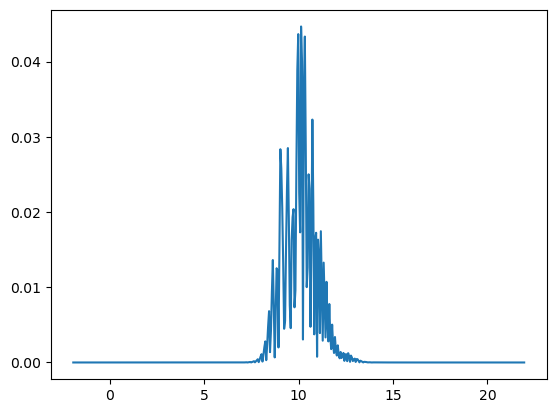

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000001C6F0F507C0>

In [108]:
u = A \ b
plot(x, abs.(u))